## Análise Exploratória de Dados com Python e Linguagem SQL do IMDB

Neste projeto é apresentado análise exploratória de dados usando Linguagem Python, Linguagem SQL e Banco de Dados SQLite. Usaremos dados reais disponíveis publicamente, dados sobre filmes no <a href="https://www.imdb.com/interfaces/">IMDB</a>.

O IMDB recebe dados reais de avaliações alimentados pelos usuários, armazena esse volume de informação e no fim disponibiliza em DataSet.

A justificativa de realizar determinada análise exploratório no IMDB é porque a mesma possui dados reais de alto valor que podem ser usados em uma empresa que queira oferecer algum tipo de serviço de stream, ou oferecer filmes para seus colaboradores.

Ao aplicar Análise Exploratória de Dados vamos responder a estas 10 perguntas de negócio:

- 1- Quais São as Categorias de Filmes Mais Comuns no IMDB?
- 2- Qual o Número de Títulos Por Gênero?
- 3- Qual a Mediana de Avaliação dos Filmes Por Gênero?
- 4- Qual a Mediana de Avaliação dos Filmes Em Relação ao Ano de Estréia?
- 5- Qual o Número de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia?
- 6- Qual o Filme Com Maior Tempo de Duração? Calcule os Percentis.
- 7- Qual a Relação Entre Duração e Gênero?
- 8- Qual o Número de Filmes Produzidos Por País?
- 9- Quais São os Top 10 Melhores Filmes?
- 10- Quais São os Top 10 Piores Filmes?

## Instalando e Carregando Pacotes

In [ ]:
# O IMDB disponibiliza vários arquivos que contém as informações do site, e para baixar tudo e organizar em banco de dados daria muito trabalho
# Diante de um problema, a primeira pergunta que deve ser feita é a seguinte: "Será que alguém do planeta terra já teve esse mesmo problema que eu?"
# É muito provável que a resposta seja "Sim"

# A estratégia foi buscar um pacote do python que faz o trabalho manual para mim, ou seja pega todos os arquivos disponibilizados pelo IMDB e armazena em banco de dados Sqlite
# Onde fui buscar o pacote para resolver meu problema? Fui buscar no Pypi que é o repositório de pacotes da linguagem python

# A seguir disponibilizei link de acesso para o repositório do python
# https://pypi.org/

# Link de acesso para o pacote que resolveu o primeiro problema do projeto
# https://pypi.org/project/imdb-sqlite/
    
# O objetivo aqui não é desenvolver algo do zero, mas de ter visão orientada a solução de problema por isso foi realizada a busca do pacote no Pypi

In [ ]:
# Instalando o pacote imdb-sqlite
# Só é possível realizar esse comando via Jupyter Notebook no sistema operacional porque é utilizado o "!" antes do comando
# Foi utilizado no comando o "-q" com finalidade de fazer a instalação silenciosa do pacote, ou seja, não mostra nenhuma saída, apenas mostra algo na tela se houver error.

!pip install -q imdb-sqlite



Agora executamos o pacote para download dos datasets.

In [ ]:
# O próximo pacote que vai ser instalado na máquina tem a função de converter o código ISO dos paises para seus respectivos nomes
# No IMDB é informado o código ISO do pais, exemplo: BR, USA e etc.
# Para não ser necessário realizar a conversão manual de todos os código ISO, a instalação desse pacote é primordial


# Link para acesso do pacote que está no repositório Pypi
# https://pypi.org/project/pycountry/


# Instalando o pacote pycountry
# Só é possível realizar esse comando via Jupyter Notebook no sistema operacional porque é utilizado o "!" antes do comando
# Foi utilizado no comando o "-q" com finalidade de fazer a instalação silenciosa do pacote, ou seja, não mostra nenhuma saída, apenas mostra algo na tela se houver error.


!pip install -q pycountry



# Momento para carregar os pacotes

Pacote principalmente usado para processar textos -> import re

Pacote para medir o tempo de execução ou trabalhar com datas -> import time

Pacote para manipular bancos Sqlite em python -> import sqlite3

Pacote tem a função de converter o código ISO dos paises para seus respectivos nomes -> import pycountry


Dupla dinâmica para manipulação de dados em python -> import numpy as np, import pandas as pd

Dupla dinâmica para visualização de dados em python (seaborn e matplotlib) -> import matplotlib.pyplot as plt, import seaborn as sns, from matplotlib import cm

Definindo tema para os gráficos do projeto -> sns.set_theme(style = "whitegrid")

In [3]:
# Imports

import re

import time

import sqlite3

import pycountry

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style = "whitegrid")

## Carregando os Dados

Primeiro temos que baixar os dados!

In [ ]:
!imdb-sqlite

In [4]:
# Conecta no banco de dados
conn = sqlite3.connect("imdb.db")

In [ ]:
# Extrai a lista de tabelas
tabelas = pd.read_sql_query("SELECT NAME AS 'Table_Name' FROM sqlite_master WHERE type = 'table'", conn)

In [ ]:
# Tipo do objeto
# DataFrame é a tabela com o nome das colunas da tabela
type(tabelas)

In [ ]:
# Visualiza o resultado
tabelas.head()

In [ ]:
# Vamos converter o dataframe em uma lista
tabelas = tabelas["Table_Name"].values.tolist()

In [ ]:
# Vamos percorrer a lista de tabelas no banco de dados e extrair o esquema de cada uma
for tabela in tabelas:
    consulta = "PRAGMA TABLE_INFO({})".format(tabela)
    resultado = pd.read_sql_query(consulta, conn)
    print("Esquema da tabela:", tabela)
    display(resultado)
    print("-"*100)
    print("\n")

> Agora começamos a Análise Exploratória dos Dados.

## 1- Quais São as Categorias de Filmes Mais Comuns no IMDB?

Quais são os principais tipos (categorias) dos títulos (filmes)?

In [ ]:
# Quando se deparar com uma pergunta de negócio, primeiro tente compreender a visuão geral. 
# Depois vá quebrando o problema em partes menores, aplicando as técnicas que conhece até entregar o resultado final.

In [ ]:
# Criando a consulta SQL
# Type é a categoria
# Count é o número de registros

consulta1 = '''SELECT type, COUNT(*) AS COUNT FROM titles GROUP BY type''' 

In [ ]:
# Extrai o resultado
resultado1 = pd.read_sql_query(consulta1, conn)

In [ ]:
# Visualiza o resultado
# display usado para exibir o resultado presente na variável "resultado1"
display(resultado1)

# E agora, já está pronto? É só entregar essa tabela e pronto?

# A resposta é Não!

# Entregaremos o resultado em formato percentual porque é mais fácil o tomador de decisão fazer a leitura.

In [ ]:
# Vamos calcular o percentual para cada tipo
# É criado uma nova coluna denominada 'percentual' e essa criação é representada da seguinte forma:  resultado1['percentual'] 
# Em seguida iremos de fato calcular o percentual, iremos pegar cada elemento dividir pelo total de elementos e multiplicar por cem

resultado1['percentual'] = (resultado1['COUNT'] / resultado1['COUNT'].sum()) * 100

In [ ]:
# Visualiza o resultado
display(resultado1)

Alguém vai dizer a você para entregar em percentual? Provavelmente não. A decisão da entrega dos dados é feita pelo analista de dados. Contudo, caso o tomador de decisão ter preferência por determinada representação dos dados, o analista entregará os dados conforme é desejado ser vistos. 

In [ ]:
# É escolhido não mostrar todas as categorias, mas apenas quatro categorias.
# O objetivo é consolidar a informação.
# Vamos criar um gráfico com apenas 4 categorias:
# As 3 categorias com mais títulos e 1 categoria com todo o restante

# Cria um dicionário vazio
others = {}

# Filtra o percentual em 5% e soma o total
others['COUNT'] = resultado1[resultado1['percentual'] < 5]['COUNT'].sum()

# Grava o percentual
others['percentual'] = resultado1[resultado1['percentual'] < 5]['percentual'].sum()

# Ajusta o nome
others['type'] = 'others'

In [ ]:
# Visualiza
others

In [ ]:
# Filtra o dataframe de resultado
resultado1 = resultado1[resultado1['percentual'] > 5]

In [ ]:
display (resultado1)

In [ ]:
# Append com o dataframe de outras categorias
resultado1 = resultado1.append(others, ignore_index = True)

In [ ]:
# Ordena o resultado
resultado1 = resultado1.sort_values(by = 'COUNT', ascending = False)

In [ ]:
# Visualiza
resultado1.head()

In [ ]:
# Ajusta os labels
# Essa linha de código é um list comprehension, nada mais é que um loop , e nesse tipo de estrutura a leitura é de trás para frente
# for i in resultado1.index      =     Para cada elemento do indíce que está em resultado1, o for busca cada elemento por vez
# str(resultado1['type'][i]      =     Retorno do resultado em formado de string, especificamente a coluna "type" que é o nome da categoria
# +' '+'                         =     Para ter espaço em branco entre o nome da categoria e o percentual da mesma estou concatenando
# str(round(resultado1['percentual'][i],2))       =       Para apresentar o percentual da categoria estou arredondando "round"  o percentual para duas casas décimais e estou convertendo para string
#  +'%'+                         =     E por fim concateno a informação do percentual com o símbolo de percentual "%"


labels = [str(resultado1['type'][i])+' '+'['+str(round(resultado1['percentual'][i],2)) +'%'+']' for i in resultado1.index]

In [ ]:
# Plot

# Mapa de cores "Set3"
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
cs = cm.Set3(np.arange(100))

# Cria a figura
f = plt.figure()

# Pie Plot
# pie é a função que cria o gráfico de pizza, todavia customizo e torna-se um gráfico de rosca

plt.pie(resultado1['COUNT'], labeldistance = 1, radius = 3, colors = cs, wedgeprops = dict(width = 0.8))
plt.legend(labels = labels, loc = 'center', prop = {'size':12})
plt.title("Distribuição de Títulos", loc = 'Center', fontdict = {'fontsize':20,'fontweight':20})
plt.show()

## 2- Qual o Número de Títulos Por Gênero?

Vamos calcular o número de filmes por gênero e entregar o resultado em valor percentual.

In [ ]:
# Cria a consulta SQL
consulta2 = '''SELECT genres, COUNT(*) FROM titles WHERE type = 'movie' GROUP BY genres''' 

In [ ]:
# Resultado
resultado2 = pd.read_sql_query(consulta2, conn)

In [ ]:
# Visualiza o resultado
display(resultado2)

O que acha desse resultado? Veja bem, seu trabalho é analise de dados e não é excutar códigos.

Precisamos primeiramente ajustar os genêros porque existe filmes que contém mais de um tipo de genêro.

In [ ]:
# Primeiro precisamos converter os nomes dos gêneros em minúsculo porque fica mais fácil para filtrar os dados
# É utilizado o "str.lower().values" para realizar a ação de converter em minúsculo, sendo o "lower" o conversor para minúsculo que faz parte do pacote do "str"
# Converte as strings para minúsculo
resultado2['genres'] = resultado2['genres'].str.lower().values

In [ ]:
# Percebemos que temos um total de 70797 filmes que não tem gênero definido sendo informado na tabela como \N
# Será descatado os valores da tabela que não estão totalmente preenchidos, ou seja, que possui \N
# Remove valores NA (ausentes)
temp = resultado2['genres'].dropna()

Usamos o Countvectorizer para converter a coluna de gêneros em um vetor one-hot encoded para contar o número de filmes em cada gênero. Ou seja, o Countvectorizer vai ser usado para contar os gêneros de cada filmes.

In [ ]:
# Vamos criar um vetor usando expressão regular para filtrar as strings

# https://docs.python.org/3.8/library/re.html
# Usando expressão regular
padrao = '(?u)\\b[\\w-]+\\b'

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# É criado o objeto chamado "vetor"
# O "fit" treina o vetor com a variável "temp" que a mesma armazena os valores da tabela sem valores \N
vetor = CountVectorizer(token_pattern = padrao, analyzer = 'word').fit(temp)

In [ ]:
type(vetor)

In [ ]:
# Nesse momento é aplicado a vetorização ao dataset sem valores NA
bag_generos = vetor.transform(temp)

In [ ]:
type(bag_generos)

In [ ]:
# A partir do vetor que já foi criado vou obter o nome dos atributos
# Retorna gêneros únicos
generos_unicos =  vetor.get_feature_names()

In [ ]:
# Converto tudo em uma tabela, ou seja, dataframe
# Cria o dataframe de gêneros
generos = pd.DataFrame(bag_generos.todense(), columns = generos_unicos, index = temp.index)

In [ ]:
# Visualiza
generos.info()

In [ ]:
# Eliminando coluna n
generos = generos.drop(columns = 'n', axis = 0)

In [ ]:
# Calcula o percentual
generos_percentual = 100 * pd.Series(generos.sum()).sort_values(ascending = False) / generos.shape[0]

In [ ]:
# Visualiza
generos_percentual.head(10)

In [ ]:
# Plot
plt.figure(figsize = (16,8))
sns.barplot(x = generos_percentual.values, y = generos_percentual.index, orient = "h", palette = "terrain")
plt.ylabel('Gênero')             
plt.xlabel("\nPercentual de Filmes (%)")
plt.title('\nNúmero (Percentual) de Títulos Por Gênero\n')
plt.show()

## 3- Qual a Mediana de Avaliação dos Filmes Por Gênero?

A média é afetada por outliers e a mediana não é afetada por valores extremos. Então, usaremos mediana de avaliação dos filmes

In [5]:
# Consulta SQL
consulta3 = '''
            SELECT rating, genres FROM 
            ratings JOIN titles ON ratings.title_id = titles.title_id 
            WHERE premiered <= 2022 AND type = 'movie'
            ''' 

In [6]:
# Resultado
resultado3 = pd.read_sql_query(consulta3, conn)

In [7]:
# Visualiza
display(resultado3)

,rating,genres
0,4.5,\N
1,6.1,"Action,Adventure,Biography"
2,5.2,Drama
3,4.5,Drama
4,3.8,Drama
...,...,...
268531,3.6,"Action,Adventure,Thriller"
268532,5.8,Thriller
268533,6.4,"Adventure,Drama,History"
268534,3.8,"Adventure,History,War"


In [8]:
# Vamos criar uma função para retornar os genêros
def retorna_generos(df):
    df['genres'] = df['genres'].str.lower().values
    temp = df['genres'].dropna()
    vetor = CountVectorizer(token_pattern = '(?u)\\b[\\w-]+\\b', analyzer = 'word').fit(temp)
    generos_unicos =  vetor.get_feature_names()
    generos_unicos = [genre for genre in generos_unicos if len(genre) > 1]
    return generos_unicos

In [9]:
# Aplica a função
generos_unicos = retorna_generos(resultado3)

In [10]:
# Visualiza
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [11]:
# Cria listas vazias
genero_counts = []
genero_ratings = []

In [12]:
# Loop
for item in generos_unicos:
    
    # Retorna a contagem de filmes por gênero
    consulta = 'SELECT COUNT(rating) FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_counts.append(resultado.values[0][0])
  
     # Retorna a avaliação de filmes por gênero
    consulta = 'SELECT rating FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_ratings.append(np.median(resultado['rating']))

In [13]:
# Prepara o dataframe final
df_genero_ratings = pd.DataFrame()
df_genero_ratings['genres'] = generos_unicos
df_genero_ratings['count'] = genero_counts
df_genero_ratings['rating'] = genero_ratings

In [14]:
# Visualiza
df_genero_ratings.head(20)

,genres,count,rating
0,action,28865,5.8
1,adult,4090,5.8
2,adventure,17708,6.0
3,animation,4689,6.5
4,biography,8081,7.0
5,comedy,66885,6.0
6,crime,23129,6.1
7,documentary,39405,7.3
8,drama,119211,6.3
9,family,10181,6.3


In [15]:
# Drop do índice 18 (news)
# Não queremos essa informação como gênero
df_genero_ratings = df_genero_ratings.drop(index = 18)

In [16]:
# Ordena o resultado
df_genero_ratings = df_genero_ratings.sort_values(by = 'rating', ascending = False)

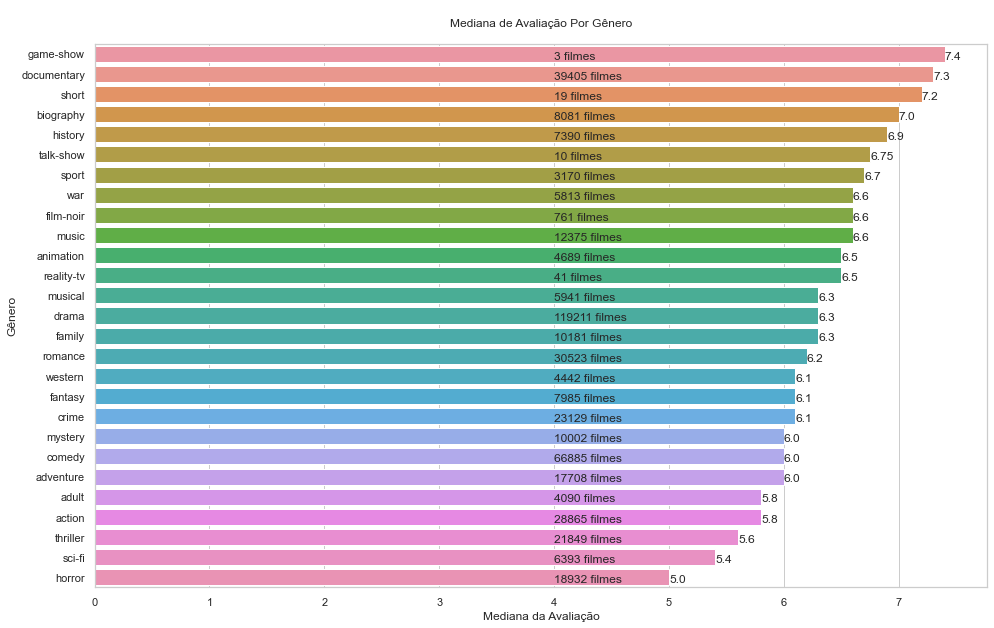

In [17]:
# Plot

# Figura
plt.figure(figsize = (16,10))

# Barplot
sns.barplot(y = df_genero_ratings.genres, x = df_genero_ratings.rating, orient = "h")

# Textos do gráfico
for i in range(len(df_genero_ratings.index)):
    
    plt.text(4.0, 
             i + 0.25, 
             str(df_genero_ratings['count'][df_genero_ratings.index[i]]) + " filmes")
    
    plt.text(df_genero_ratings.rating[df_genero_ratings.index[i]],
             i + 0.25,
             round(df_genero_ratings["rating"][df_genero_ratings.index[i]],2))

plt.ylabel('Gênero')             
plt.xlabel('Mediana da Avaliação')
plt.title('\nMediana de Avaliação Por Gênero\n')
plt.show()

## 4- Qual a Mediana de Avaliação dos Filmes Em Relação ao Ano de Estréia?

Mediana de avaliação dos filmes.

In [ ]:
# Consulta SQL
consulta4 = '''
            SELECT rating AS Rating, premiered FROM 
            ratings JOIN titles ON ratings.title_id = titles.title_id 
            WHERE premiered <= 2022 AND type = 'movie'
            ORDER BY premiered
            ''' 

In [ ]:
# Resultado
resultado4 = pd.read_sql_query(consulta4, conn)

In [ ]:
display(resultado4)

In [ ]:
# Calculamos a mediana ao longo do tempo (anos)
ratings = []
for year in set(resultado4['premiered']):
    ratings.append(np.median(resultado4[resultado4['premiered'] == year]['Rating']))

In [ ]:
type(ratings)

In [ ]:
ratings[1:10]

In [ ]:
# Lista de anos
anos = list(set(resultado4['premiered']))

In [ ]:
anos[1:10]

In [ ]:
# Plot
plt.figure(figsize = (16,8))
plt.plot(anos, ratings)
plt.xlabel('\nAno')
plt.ylabel('Mediana de Avaliação')
plt.title('\nMediana de Avaliação dos Filmes Em Relação ao Ano de Estréia\n')
plt.show()

## 5- Qual o Número de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia?

Número de filmes por gênero. Vamos listar os Top 5.

In [ ]:
# Consulta SQL
consulta5 = '''SELECT genres FROM titles ''' 

In [ ]:
# Resultado
resultado5 = pd.read_sql_query(consulta5, conn)

In [ ]:
display(resultado5)

In [ ]:
# Retorna gêneros únicos
generos_unicos = retorna_generos(resultado5)

In [ ]:
# Visualiza o resultado
generos_unicos

In [ ]:
# Agora fazemos a contagem
genero_count = []
for item in generos_unicos:
    consulta = 'SELECT COUNT(*) COUNT FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND premiered <= 2022'
    resultado = pd.read_sql_query(consulta, conn)
    genero_count.append(resultado['COUNT'].values[0])

In [ ]:
# Prepara o dataframe
df_genero_count = pd.DataFrame()
df_genero_count['genre'] = generos_unicos
df_genero_count['Count'] = genero_count

In [ ]:
# Calcula os top 5
df_genero_count = df_genero_count[df_genero_count['genre'] != 'n']
df_genero_count = df_genero_count.sort_values(by = 'Count', ascending = False)
top_generos = df_genero_count.head()['genre'].values

In [ ]:
# Plot

# Figura
plt.figure(figsize = (16,8))

# Loop e Plot
for item in top_generos:
    consulta = 'SELECT COUNT(*) Number_of_movies, premiered Year FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Year <=2022 GROUP BY Year'
    resultado = pd.read_sql_query(consulta, conn)
    plt.plot(resultado['Year'], resultado['Number_of_movies'])

plt.xlabel('\nAno')
plt.ylabel('Número de Filmes Avaliados')
plt.title('\nNúmero de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia\n')
plt.legend(labels = top_generos)
plt.show()

## 6- Qual o Filme Com Maior Tempo de Duração? Calcule os Percentis.

Percentis e filme mais longo da história.

In [ ]:
# Consulta SQL
consulta6 = '''
            SELECT runtime_minutes Runtime 
            FROM titles 
            WHERE type = 'movie' AND Runtime != 'NaN'
            ''' 

In [ ]:
# Resultado
resultado6 = pd.read_sql_query(consulta6, conn)

In [ ]:
display(resultado6)

In [ ]:
# Loop para cálculo dos percentis
for i in range(101): 
    val = i
    perc = round(np.percentile(resultado6['Runtime'].values, val), 2)
    print('{} percentil da duração (runtime) é: {}'.format(val, perc))

In [ ]:
# Refazendo a consulta e retornando o filme com maior duração
consulta6 = '''
            SELECT runtime_minutes Runtime, primary_title
            FROM titles 
            WHERE type = 'movie' AND Runtime != 'NaN'
            ORDER BY Runtime DESC
            LIMIT 1
            ''' 

In [ ]:
resultado6 = pd.read_sql_query(consulta6, conn)

In [ ]:
resultado6

'Logistics' é o filme mais longo da história (até este momento), com 857 horas (51420 minutos). Dirigido por Daniel Andersson e Erika Magnusson, o filme acompanha todo o ciclo de vida de um pedômetro (dispositivo de rastreamento de passos) em ordem cronológica reversa.

## 7- Qual a Relação Entre Duração e Gênero?

Relação entre duração do filme e gênero.

In [ ]:
# Consulta SQL
consulta7 = '''
            SELECT AVG(runtime_minutes) Runtime, genres 
            FROM titles 
            WHERE type = 'movie'
            AND runtime_minutes != 'NaN'
            GROUP BY genres
            ''' 

In [ ]:
# Resultado
resultado7 = pd.read_sql_query(consulta7, conn)

In [ ]:
# Retorna gêneros únicos
generos_unicos = retorna_generos(resultado7)

In [ ]:
# Visualiza
generos_unicos

In [ ]:
# Calcula duração por gênero
genero_runtime = []
for item in generos_unicos:
    consulta = 'SELECT runtime_minutes Runtime FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Runtime!=\'NaN\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_runtime.append(np.median(resultado['Runtime']))

In [ ]:
# Prepara o dataframe
df_genero_runtime = pd.DataFrame()
df_genero_runtime['genre'] = generos_unicos
df_genero_runtime['runtime'] = genero_runtime

In [ ]:
# Remove índice 18 (news)
df_genero_runtime = df_genero_runtime.drop(index = 18)

In [ ]:
# Ordena os dados
df_genero_runtime = df_genero_runtime.sort_values(by = 'runtime', ascending = False)

In [ ]:
# Plot

# Tamanho da figura
plt.figure(figsize = (16,8))

# Barplot
sns.barplot(y = df_genero_runtime.genre, x = df_genero_runtime.runtime, orient = "h")

# Loop
for i in range(len(df_genero_runtime.index)):
    plt.text(df_genero_runtime.runtime[df_genero_runtime.index[i]],
             i + 0.25,
             round(df_genero_runtime["runtime"][df_genero_runtime.index[i]], 2))

plt.ylabel('Gênero')             
plt.xlabel('\nMediana de Tempo de Duração (Minutos)')
plt.title('\nRelação Entre Duração e Gênero\n')
plt.show()

## 8- Qual o Número de Filmes Produzidos Por País?

Número de filmes produzidos por país.

In [ ]:
# Consulta SQL
consulta8 = '''
            SELECT region, COUNT(*) Number_of_movies FROM 
            akas JOIN titles ON 
            akas.title_id = titles.title_id
            WHERE region != 'None'
            AND type = \'movie\'
            GROUP BY region
            ''' 

In [ ]:
# Resultado
resultado8 = pd.read_sql_query(consulta8, conn)

In [ ]:
display(resultado8)

In [ ]:
# Shape
resultado8.shape

In [ ]:
# Número de linhas
resultado8.shape[0]

In [ ]:
# Listas auxiliares
nomes_paises = []
contagem = []

In [ ]:
# Loop para obter o país de acordo com a região
for i in range(resultado8.shape[0]):
    try:
        coun = resultado8['region'].values[i]
        nomes_paises.append(pycountry.countries.get(alpha_2 = coun).name)
        contagem.append(resultado8['Number_of_movies'].values[i])
    except: 
        continue

In [ ]:
# Prepara o dataframe
df_filmes_paises = pd.DataFrame()
df_filmes_paises['country'] = nomes_paises
df_filmes_paises['Movie_Count'] = contagem

In [ ]:
# Ordena o resultado
df_filmes_paises = df_filmes_paises.sort_values(by = 'Movie_Count', ascending = False)

In [ ]:
# Visualiza
df_filmes_paises.head(10)

In [ ]:
# Plot

# Figura
plt.figure(figsize = (20,8))

# Barplot
sns.barplot(y = df_filmes_paises[:20].country, x = df_filmes_paises[:20].Movie_Count, orient = "h")

# Loop
for i in range(0,20):
    plt.text(df_filmes_paises.Movie_Count[df_filmes_paises.index[i]]-1,
             i + 0.30,
             round(df_filmes_paises["Movie_Count"][df_filmes_paises.index[i]],2))

plt.ylabel('País')             
plt.xlabel('\nNúmero de Filmes')
plt.title('\nNúmero de Filmes Produzidos Por País\n')
plt.show()

## 9- Quais São os Top 10 Melhores Filmes?

Top 10 filmes com melhor avaliação e mais de 25 mil votos.

In [ ]:
# Consulta SQL
consulta9 = '''
            SELECT primary_title AS Movie_Name, genres, rating
            FROM 
            titles JOIN ratings
            ON  titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 25000
            ORDER BY rating DESC
            LIMIT 10          
            ''' 

In [ ]:
# Resultado
top10_melhores_filmes = pd.read_sql_query(consulta9, conn)

In [ ]:
display(top10_melhores_filmes)

## 10- Quais São os Top 10 Piores Filmes?

Top 10 filmes com pior avaliação e mais de 25 mil votos.

In [ ]:
# Consulta SQL
consulta10 = '''
            SELECT primary_title AS Movie_Name, genres, rating
            FROM 
            titles JOIN ratings
            ON  titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 25000
            ORDER BY rating ASC
            LIMIT 10
            ''' 

In [ ]:
# Resultado
top10_piores_filmes = pd.read_sql_query(consulta10, conn)

In [ ]:
display(top10_piores_filmes)

# Fim

### Obrigado